In [67]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm_notebook as tqdm

In [68]:
# Loading in the cleaned DF
with open("refined_profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

# Viewing the DF    
df.head()

,Bios,Movies,Religion,Music,Politics,Social Media,Sports,Age
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,"[Thriller, Action]",Buddhist,"[Gospel, Pop, Rock]",Progressive,"[Twitter, Reddit, Instagram]","[Basketball, Football, Hockey]",19
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,"[Comedy, Drama]",Spiritual,"[HipHop, Pop]",Conservative,"[Twitter, Facebook]","[Basketball, Soccer, Hockey]",19
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,"[Horror, Comedy]",Christian,"[HipHop, Rock]",Moderate,"[Reddit, Youtube]","[Baseball, Football]",21
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,"[Adventure, Comedy]",Agnostic,[Rock],Moderate,"[Facebook, Youtube]","[Basketball, Football, Hockey]",25
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,"[Action, Adventure, Drama]",Hindu,"[Latin, Rock, HipHop]",Conservative,"[Twitter, TikTok, Youtube]","[Hockey, Football, Basketball]",19


In [69]:
def string_convert(x):
    """
    First converts the lists in the DF into strings
    """
    if isinstance(x, list):
        return ' '.join(x)
    else:
        return x
    
# Looping through the columns and applying the function
for col in df.columns:
    df[col] = df[col].apply(string_convert)

In [70]:
df

,Bios,Movies,Religion,Music,Politics,Social Media,Sports,Age
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,Thriller Action,Buddhist,Gospel Pop Rock,Progressive,Twitter Reddit Instagram,Basketball Football Hockey,19
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,Comedy Drama,Spiritual,HipHop Pop,Conservative,Twitter Facebook,Basketball Soccer Hockey,19
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,Horror Comedy,Christian,HipHop Rock,Moderate,Reddit Youtube,Baseball Football,21
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,Adventure Comedy,Agnostic,Rock,Moderate,Facebook Youtube,Basketball Football Hockey,25
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,Action Adventure Drama,Hindu,Latin Rock HipHop,Conservative,Twitter TikTok Youtube,Hockey Football Basketball,19
...,...,...,...,...,...,...,...,...
6595,Typical pop culture nerd. Infuriatingly humble internet maven. Alcohol evangelist.,Thriller Comedy Action,Catholic,Pop Rock HipHop,Liberal,Facebook Reddit Youtube,Baseball,28
6596,Avid web junkie. Lifelong alcohol guru. Hardcore reader. Award-winning twitter evangelist.,Action Horror,Spiritual,Rock Classical,Conservative,Facebook Instagram Youtube,Baseball Hockey,24
6597,Music ninja. Bacon fanatic. Reader. Total communicator. Unapologetic beer specialist.,Adventure Drama,Catholic,Country HipHop,Progressive,Facebook Youtube,Football Basketball,24
6598,Communicator. Bacon lover. Award-winning introvert. Amateur internet ninja.,Adventure Drama,Christian,Country Pop Rock,Moderate,Pinterest Facebook Reddit,Baseball Football,20


In [71]:
def vectorization(df, columns):
    """
    Using recursion, iterate through the df until all the categories have been vectorized
    """
    column_name = columns[0]
    
    # Checking if the column name has been removed already
    if column_name not in ['Bios', 'Movies','Religion', 'Music', 'Politics', 'Social Media', 'Sports']:
        return df
    
    if column_name in ['Religion', 'Politics']:
        df[column_name.lower()] = df[column_name].cat.codes
        
        df = df.drop(column_name, 1)
        
        return vectorization(df, df.columns)
    
    else:
        # Instantiating the Vectorizer
        vectorizer = CountVectorizer()
        
        # Fitting the vectorizer to the Bios
        x = vectorizer.fit_transform(df[column_name])

        # Creating a new DF that contains the vectorized words
        df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())

        # Concating the words DF with the original DF
        new_df = pd.concat([df, df_wrds], axis=1)

        # Dropping the column because it is no longer needed in place of vectorization
        new_df = new_df.drop(column_name, axis=1)
        
        return vectorization(new_df, new_df.columns) 

In [72]:
# Creating the vectorized DF
vect_df = vectorization(df, df.columns)

C:\Users\dini2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dini2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dini2\AppData\Local\Temp\ipykernel_14320\2338539963.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(column_name, 1)
C:\Users\dini2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 

In [73]:
# Scaling
scaler = MinMaxScaler()

vect_df = pd.DataFrame(scaler.fit_transform(vect_df), index=vect_df.index, columns=vect_df.columns)

In [74]:
vect_df

,Age,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,animals,apathy,avid,...,snapchat,tiktok,twitter,youtube,baseball,basketball,football,hockey,other,soccer
0,0.032258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.032258,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.096774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.225806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.032258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,0.322581,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6596,0.193548,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
6597,0.193548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
6598,0.064516,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [75]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(vect_df)

# Finding the exact number of features that explain at least 99% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_9 = len(total_explained_variance[total_explained_variance>=.99])
n_to_reach_9 = vect_df.shape[1] - n_over_9

print("PCA reduces the # of features from", vect_df.shape[1], 'to', n_to_reach_9)

# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_9)

# Fitting and transforming the dataset to the stated number of features
df_pca = pca.fit_transform(vect_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
pca.explained_variance_ratio_.cumsum()[-1]

PCA reduces the # of features from 146 to 111


0.989854882538579

In [82]:

# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in cluster_cnt:
    
    # Hierarchical Agglomerative Clustering with different number of clusters
    #hac = AgglomerativeClustering(n_clusters=i)
    
    #hac.fit(df_pca)
    
    #cluster_assignments = hac.labels_
    
    ## KMeans Clustering with different number of clusters
    k_means = KMeans(n_clusters=i)
    
    k_means.fit(df_pca)
    cluster_assignments = k_means.labels_
    
    
    # Appending the scores to the empty lists    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))
print('finished')

finished


In [83]:
def cluster_eval(y, x):
    """
    Prints the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('bmh')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()


The Silhouette Coefficient Score (find max score):
Max Value:
Cluster #    Cluster Score
3       0.027921

Min Value:
Cluster #    Cluster Score
9       0.015817


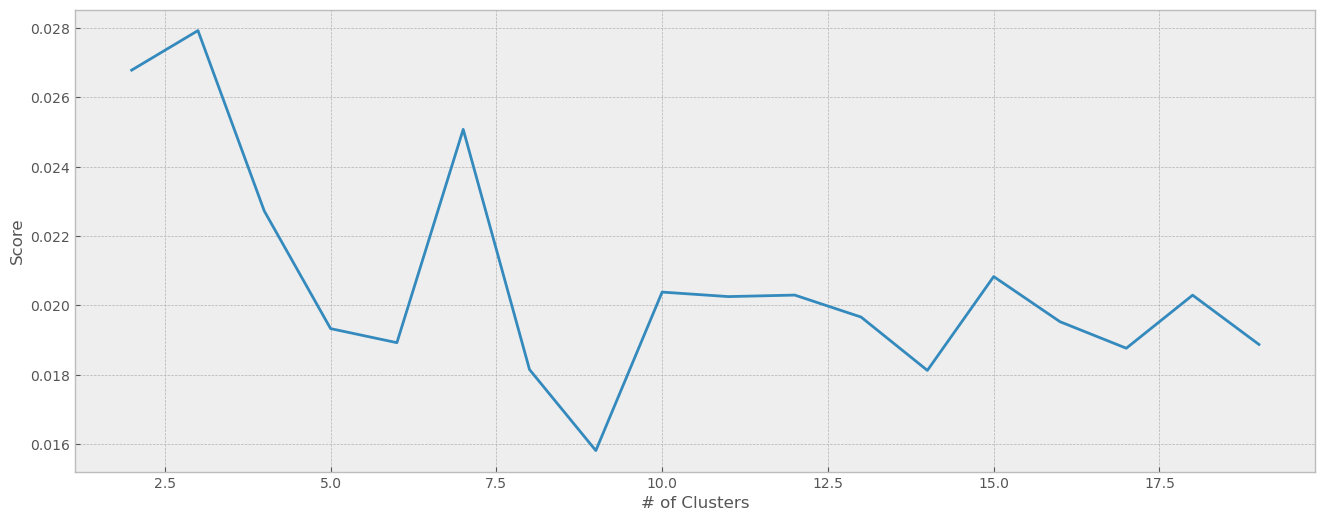


The Davies-Bouldin Score (find minimum score):
Max Value:
Cluster #    Cluster Score
4       6.117121

Min Value:
Cluster #    Cluster Score
9       5.315771


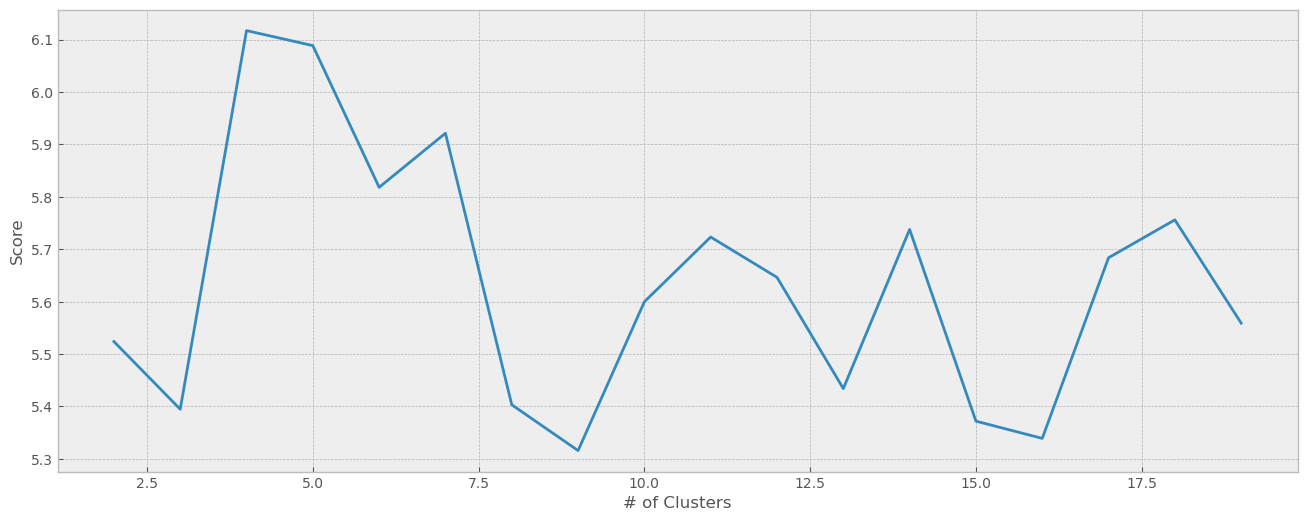

In [84]:

print("\nThe Silhouette Coefficient Score (find max score):")
cluster_eval(s_scores, cluster_cnt)

print("\nThe Davies-Bouldin Score (find minimum score):")
cluster_eval(db_scores, cluster_cnt)

In [86]:

# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in cluster_cnt:
    
    # Hierarchical Agglomerative Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
    #cluster_assignments = hac.predict(df_pca)
    ## KMeans Clustering with different number of clusters
    #k_means = KMeans(n_clusters=i)
    
    #k_means.fit(df_pca)
    
    #cluster_assignments = k_means.predict(df_pca)
    
    # Appending the scores to the empty lists    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))
print('finished')

finished



The Silhouette Coefficient Score (find max score):
Max Value:
Cluster #    Cluster Score
3       0.017041

Min Value:
Cluster #     Cluster Score
19       0.005216


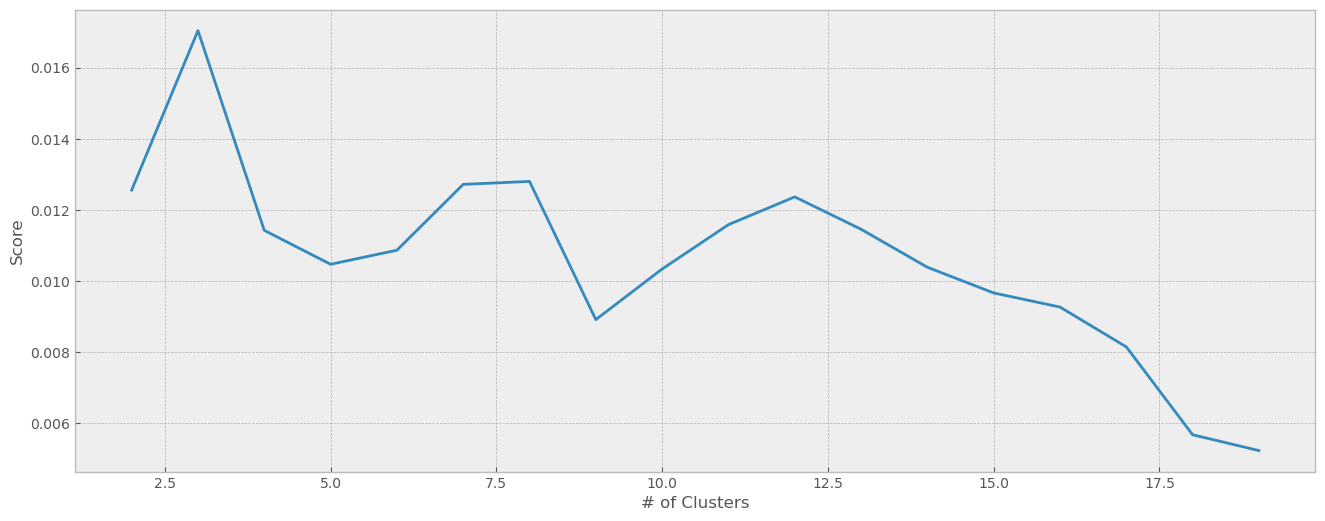


The Davies-Bouldin Score (find minimum score):
Max Value:
Cluster #    Cluster Score
2         6.6074

Min Value:
Cluster #     Cluster Score
12       5.114636


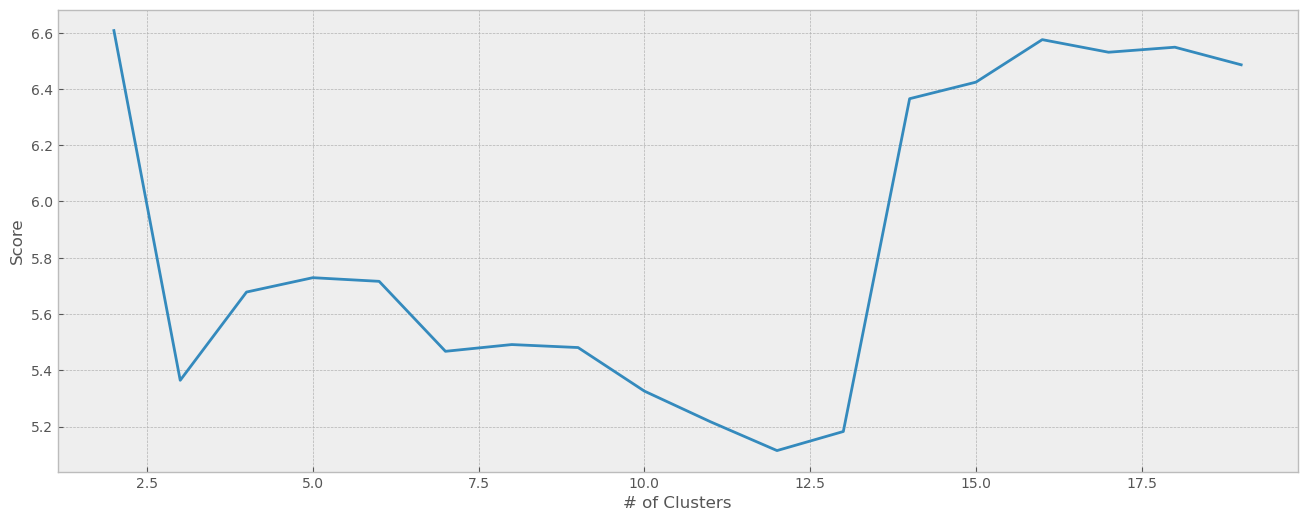

In [87]:
print("\nThe Silhouette Coefficient Score (find max score):")
cluster_eval(s_scores, cluster_cnt)

print("\nThe Davies-Bouldin Score (find minimum score):")
cluster_eval(db_scores, cluster_cnt)